Goodness of a fit 
==========
This notebook illustrates different aspects of the goodness of a fit (bias-variance tradeoff, and over or under-fitting) by using [the polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression) in the context of one explanatory variabledans.  
We briefly describe hereafter the theory of the polynomial regresion.

Polynomial regression
----------
We are looking at explaining or predicting $y$ from only one explanatory variable $x$. For example, a quadratic regression model estimates $y$ by using the following  function $f$:
  $$y\approx f(x)=a_0\times 1 + a_1\times x + a_2\times x^2$$
where $(a,b,c)$ are the trainable parameters. The function $f$ is thus a linear combination of the following basic functions of $x$: $(1,x,x^2)$.  

The Figure below displays curves for different values of $(a,b,c)$ parameters.

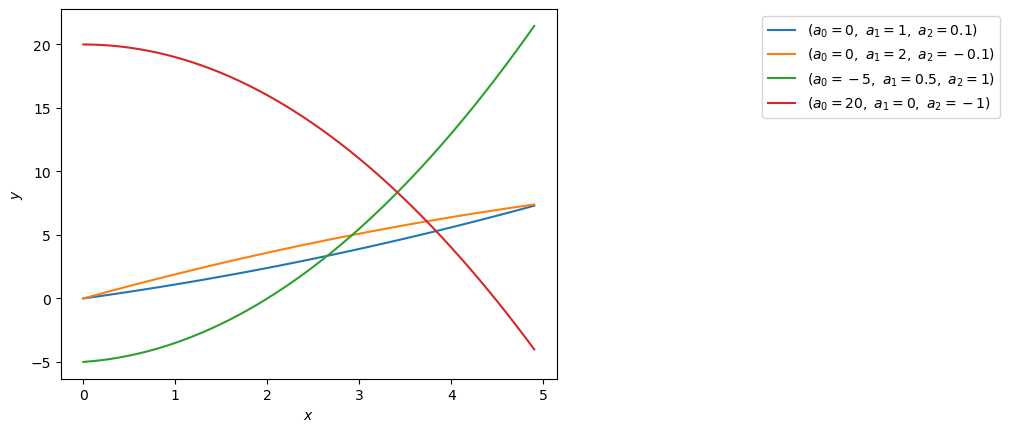

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

# Generate points between (0,5)
x = numpy.arange(0., 5., 0.1)

def makelabel(a,b,c):
    return r'$(a_0=' + str(a0) + ',\ a_1=' + str(a1) + ',\ a_2=' + str(a2) + ')$'

# Curves for different value parameters
[a0,a1,a2]  = [0,1,0.1]
plt.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [0,2,-0.1]
plt.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [-5,0.5,1]
plt.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
[a0,a1,a2]  = [20,0,-1]
plt.plot(x, a0 + a1*x + a2*x**2, label=makelabel(a0,a1,a2))
plt.legend(bbox_to_anchor=(1.4, 1.0))
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.show()

In [ ]:
!which python


In the case of a polynomial regression of degree $n$ (also named *order*), we search for $n+1$ coefficients such as
$$y\approx f(x) = a_0 + a_1x + a_2x^2 + \cdots a_nx_n = \sum_{i=0}^n a_ix^i $$

# Construction of a synthetic dataset
We construct here a synthetic dataset for which we know the function that allows us to generate new data.
The advantage of synthetic dataset is to control the different setting such as the number of (training and testing) examples, and the degree of the polynomial functions.

## Setting
The dataset has several characteristics including the number of observations, the function $f$ to generate new data, the level of noise, or the minimum and maximum values for the display.

The values of $x$ are selected at random in the following ranges for a given number of examples:
+ *rd.xmin* : minimum for $x$ from the "regressiondemo.py" library, set to 0
+ *rd.xmax* : maximum for $x$ from the "regressiondemo.py" library, set to 10
+ *m* : number of points/observations, defined locally in the notebook

The values of $y$ depends on the "true" function $f$ and the level of noise:
+ *truefunc()* : the "true" function $f$ that generates the data, defined locally in the notebook
+ *sigma* : the standard-deviation of the noise, defined locally in the notebook

For the display, $y$ values are restrained to 
+ *ydisplaymin* : minimum of $y$, defined locally in the notebook
+ *ydisplaymax* : maximum of $y$, defined locally in the notebook

## Step 1.1: generation of non-noisy data
First, we generate non-noisy data. Observations follows perfectly the funciton $f$. The function $f$, the number of observations (traning data), and the noise level can be modified in the following cells.

In [144]:
# import
%matplotlib inline
import matplotlib.pyplot as pl
import sys
import os
import random
#  import regressiondemo
sys.path.append(os.getcwd())
import regressiondemo as rd

In [145]:
##############################
#      Setting
#=======================
# The true function (f(x))
def truefunc(x):
    return numpy.sin(x*2.0)*numpy.sqrt(x)/3.3

#  for the display
ydisplaymin = -1.8
ydisplaymax = 1.8

#  do not test for m>100 (O(m^3))
m = 60

# generate a vector x (at random)
x = rd.makeX(m)
# true y values
yt = truefunc(x)

# generate xts and yts for the dispaly (strong point density)
xts = rd.makeX(200,uniform=True)
yts = truefunc(xts)

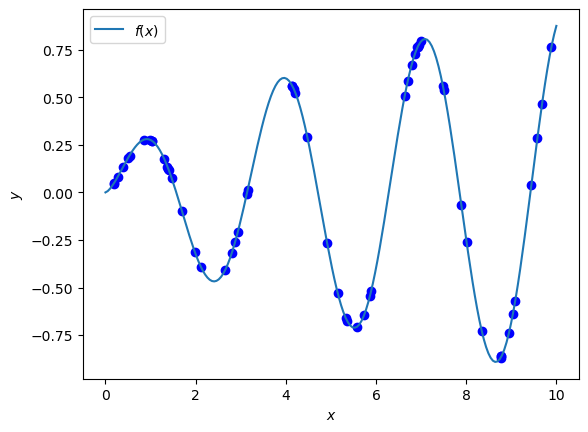

In [146]:
# Figure
pl.plot(x, yt, 'bo')
pl.plot(xts, yts,label = r'$f(x)$') 
pl.ylabel(r'$y$')
pl.xlabel(r'$x$')
pl.legend()
pl.show()

## Step 1.2:  Adding some noise
To get more real data, a commonly used approach consists in adding some noise to $y$.
Here, we add a Gaussian noise (standard deviation *sigma*).

What does represent the figure below?

In [147]:
#  noise level
rd.setSigma(1)
#  Add Gaussian noise
y = rd.addNoise(yt,laplace=True)

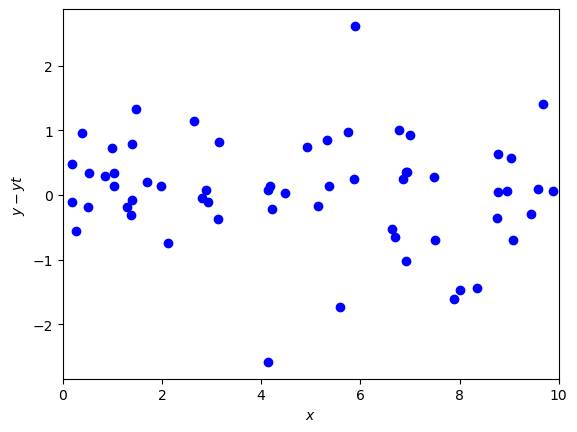

In [148]:
pl.plot(x, y-yt, 'bo') 
pl.ylabel(r'$y-yt$')
pl.xlabel(r'$x$')
pl.xlim(rd.xmin,rd.xmax)
pl.show()

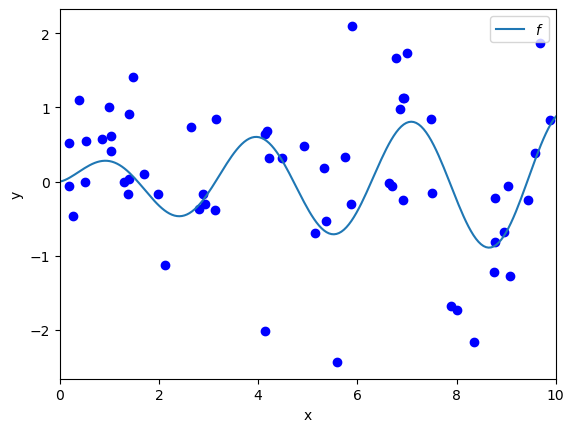

In [149]:
# Data
pl.plot(x, y, 'bo') 
pl.ylabel('y')
pl.xlabel('x')
pl.xlim(rd.xmin,rd.xmax)
pl.plot(xts, yts,label = r'$f$')
pl.legend()

# Polynomial regression
We will use the polynomial regression function of Numpy: *np.polyfit()*.  
This determines the parameter $a_i$ ($1\le i \le n$), where $n$ is the degree of the polynomial function, which minimise the quadratic cost (same cost than for the linear regression):
    $$\sum_{i=1}^m (y_i-f(x_i))^2 $$

Here, we do not have interest in the optimisation algorithm (we could use for example the gradient descent algorithm).

## Step 1.3: polynomial regression
Let us try first we a polynom of order 4.
Please note that the thick blue line is $f$, whereas the green curve (thiner) corresponds to the learned model $\hat{f}$.

In [150]:
##############################
#      Setting
#      =======================
#     change the *order* value to test for polynoms of different degrees
order = 10
##############################

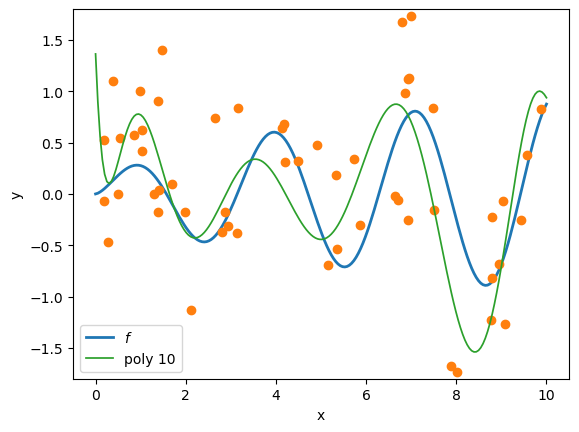

In [151]:

# plot data and the truth
pl.plot(xts, yts,label = r'$f$', linewidth=2) 
pl.plot(x, y, 'o') 
pl.ylabel('y')
pl.xlabel('x')

#  build the fitted poly curve (xts,ys) from order-th regression
ys = rd.linReg(x,y,xts,order)

#  plot fitted curve
pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )  
pl.ylim(ydisplaymin,ydisplaymax)
pl.legend()

The polynomial functions of low degree do not work very well to explain our complex $f$ function.

## Step 1.4: on a mystery function
Here we generate new data. The function *rd.demoReg1()* defines its own function $f$ to generate data.

Text(0.5, 0, '$x$')

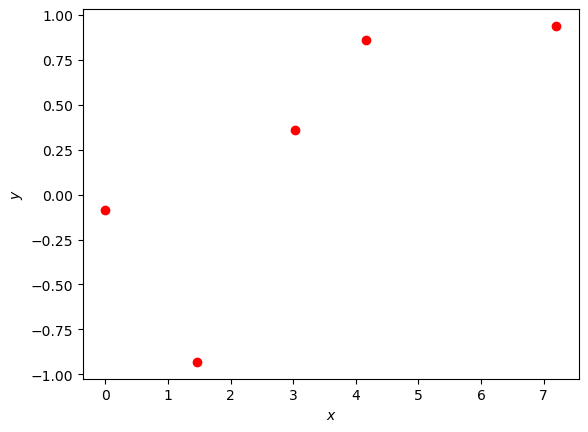

In [160]:
##############################
#      Setting
#      =======================
#     # observations/points
ydisplaymin = -2.0
ydisplaymax = 2.0
m = 5
##############################
# plot
rd.setSigma(0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color='red') 
pl.ylabel(r'$y$')
pl.xlabel(r'$x$')

We will now try different fits

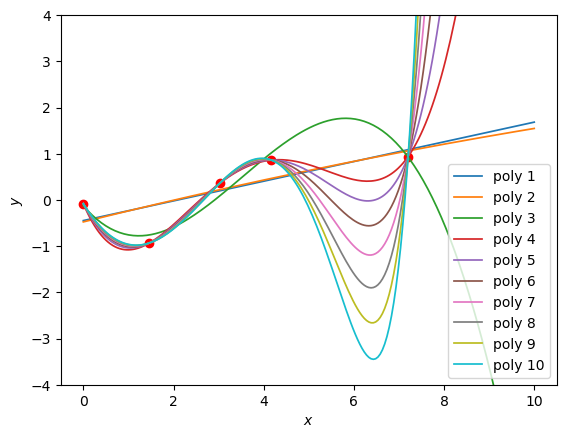

In [191]:
##############################
#      Setting
#      =======================

#     change the *order* value to test polynomial functions of different degrees
ydisplaymin = -4.0
ydisplaymax = 4.0
m=5
rd.setSigma(0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,11):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()

### My Comment

Using only 5 observation points ( or training data), and polynomial function with orders ranging from 1-10, it is observed that the polynomial function with an order of 4 (as seen as the red curve), best explains the mystery function. However, this migt be a case of an overfit as the curve fits through the points perfectly. Perharps when noises are introduced, the bebst fit might be clear, despite few data observations 

Text(0.5, 1.0, 'm=5; Noise Level = 1.0')

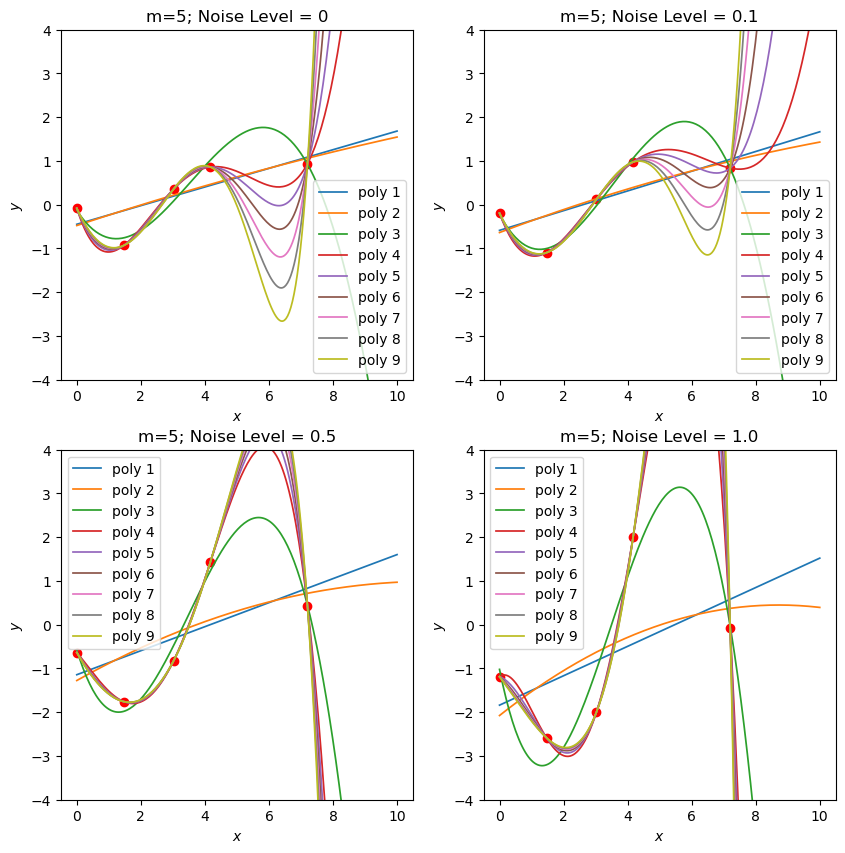

In [181]:
##############################
#      Setting
#      =======================

#     change the *order* value to test polynomial functions of different degrees

plt.figure(figsize=(10,10))


ydisplaymin = -4.0
ydisplaymax = 4.0

m = 5
pl.subplot(221)

#plot 1,  noise level set to zero
rd.setSigma(0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,10):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=5; Noise Level = 0")



pl.subplot(222)

#plot 2, noise level set to 0.1
rd.setSigma(0.1)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,10):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=5; Noise Level = 0.1")


#plot 3, noise level set to 0.5
pl.subplot(223)

rd.setSigma(0.5)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,10):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=5; Noise Level = 0.5")


#plot 4, noise level set to 1
pl.subplot(224)
 
rd.setSigma(1.0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,10):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=5; Noise Level = 1.0")


### My Comment

Using the same number of training data and also the same range of polynomial degrees, but an introduction of noise levels, it is clear now that the polynomial function with a degree of 4 (red curve) is overfitted as noises were introduced. This shows that it does not perform well at generalising once other data points I introduced. From the illustration above, th polynomial curve with a degree of 3 (the green curve) is a probable best fit and might perform better at generalisation, especially at noise level of 0.1

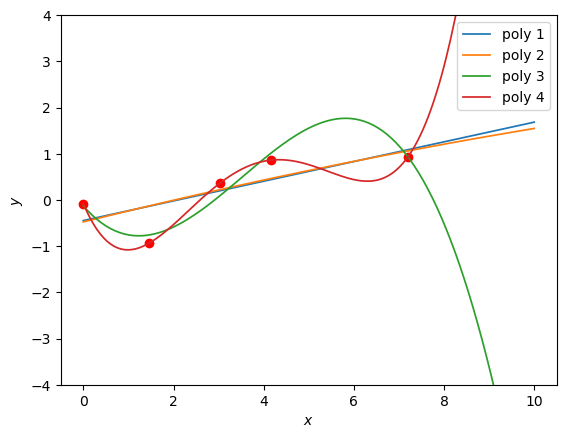

In [182]:
##############################
#      Setting
#      =======================

#     change the *order* value to test polynomial functions of different degrees
ydisplaymin = -4.0
ydisplaymax = 4.0
m=5
rd.setSigma(0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)

pl.plot(x, y, 'o', color="red") 

pl.ylabel(r'$y$')
pl.xlabel(r'$x$')

#  build the fitted poly curve (xts,ys) from order-th regression
order = 1
ys = rd.linReg(x,y,xts,order)
#  plot fitted curve
pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )  
pl.ylim(ydisplaymin,ydisplaymax)
pl.legend()

order = 2
ys = rd.linReg(x,y,xts,order)
#  plot fitted curve
pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )  
pl.ylim(ydisplaymin,ydisplaymax)

order = 3
ys = rd.linReg(x,y,xts,order)
#  plot fitted curve
pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )  
pl.ylim(ydisplaymin,ydisplaymax)

order = 4
ys = rd.linReg(x,y,xts,order)
#  plot fitted curve
pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )  
pl.ylim(ydisplaymin,ydisplaymax)


pl.legend()

Test for different quantity of training data ($m$) and different polynomial functions (*order*), and different noise.

Display the different figures, and **comment** them.

Text(0.5, 1.0, 'm=60; Noise Level = 4.0')

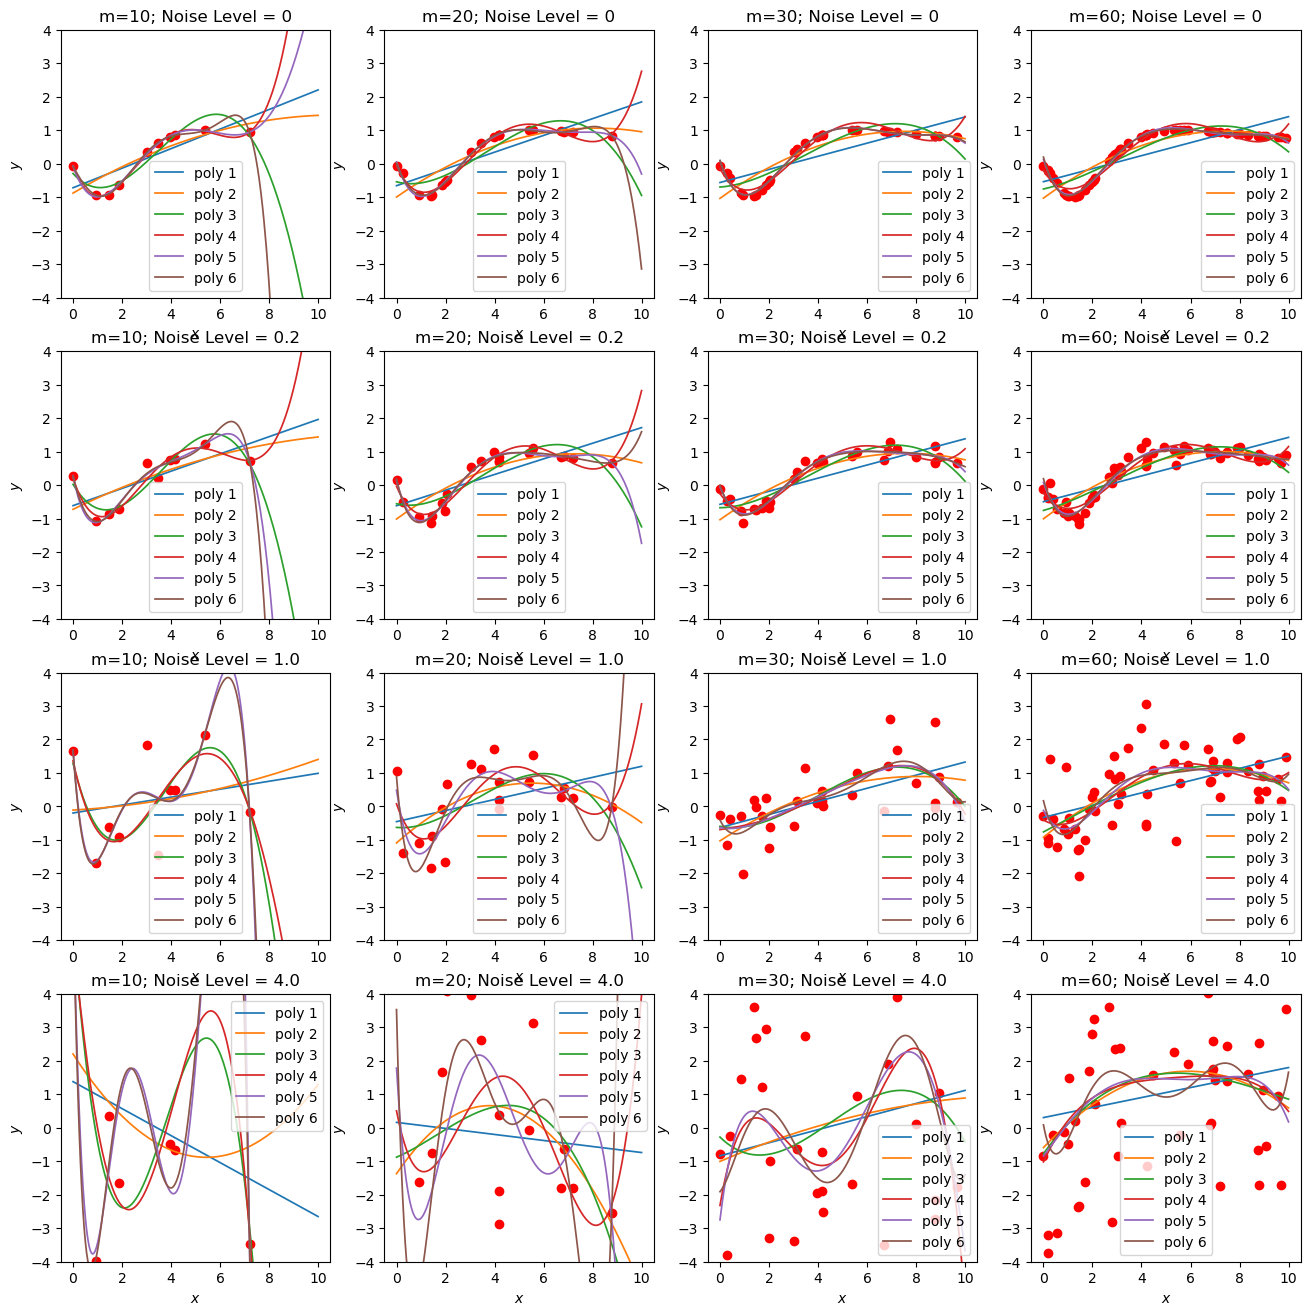

In [190]:

#size of entire graph
plt.figure(figsize=(16,16))

ydisplaymin = -4.0
ydisplaymax = 4.0


#PLOT ONE
pl.subplot(4,4,1)
m=10
rd.setSigma(0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.title("m=10; Noise Level = 0")


#PLOT TWO
pl.subplot(4,4,2)
m=20
rd.setSigma(0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.title("m=20; Noise Level = 0")

#PLOT THREE
pl.subplot(4,4,3)
m=30
rd.setSigma(0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
    
pl.title("m=30; Noise Level = 0")

#PLOT FOUR
pl.subplot(4,4,4)
m=60
rd.setSigma(0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=60; Noise Level = 0")

### noise level at 0.2


#PLOT FIVE
pl.subplot(4,4,5)
m=10
rd.setSigma(0.2)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=10; Noise Level = 0.2")


#PLOT SIX
pl.subplot(4,4,6)
m=20
rd.setSigma(0.2)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=20; Noise Level = 0.2")

#PLOT SEVEN
pl.subplot(4,4,7)
m=30
rd.setSigma(0.2)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=30; Noise Level = 0.2")

#PLOT EIGHT
pl.subplot(4,4,8)
m=60
rd.setSigma(0.2)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=60; Noise Level = 0.2")


### noise level at 1.0


#PLOT NINE
pl.subplot(4,4,9)
m=10
rd.setSigma(1.0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=10; Noise Level = 1.0")


#PLOT TEN
pl.subplot(4,4,10)
m=20
rd.setSigma(1.0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=20; Noise Level = 1.0")

#PLOT ELEVEN
pl.subplot(4,4,11)
m=30
rd.setSigma(1.0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=30; Noise Level = 1.0")

#PLOT TWELVE
pl.subplot(4,4,12)
m=60
rd.setSigma(1.0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=60; Noise Level = 1.0")


### noise level at 4.0


#PLOT THIRTEEN
pl.subplot(4,4,13)
m=10
rd.setSigma(4.0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=10; Noise Level = 4.0")


#PLOT FOURTEEN
pl.subplot(4,4,14)
m=20
rd.setSigma(4.0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=20; Noise Level = 4.0")

#PLOT FIFTEEN
pl.subplot(4,4,15)
m=30
rd.setSigma(4.0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=30; Noise Level = 4.0")

#PLOT SIXTEEN
pl.subplot(4,4,16)
m=60
rd.setSigma(4.0)
numpy.random.seed(1)
x,y = rd.demoReg1(m)
pl.plot(x, y, 'o', color="red")
pl.ylim(ydisplaymin,ydisplaymax)

for order in range(1,7):
    ys = rd.linReg(x,y,xts,order)
    pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )   
    pl.ylabel(r'$y$')
    pl.xlabel(r'$x$')
pl.legend()
pl.title("m=60; Noise Level = 4.0")

### My Comment

As the number of observations increases, and the noise level increases also, it becomes difficult to gete the best model fit. However, the polynomial function with degree of 6 seems to perform best at making generalisations despite the  increase in the noise levesl and the observations. It might then be a good fit. However, here, I only observed functions with  a degree range from 1-6. My guess is that the higher the degree order of the function, the better the fit, despite an increase in the noise as well as the number of observations.
